# Most common symptoms from 1990 to 2023

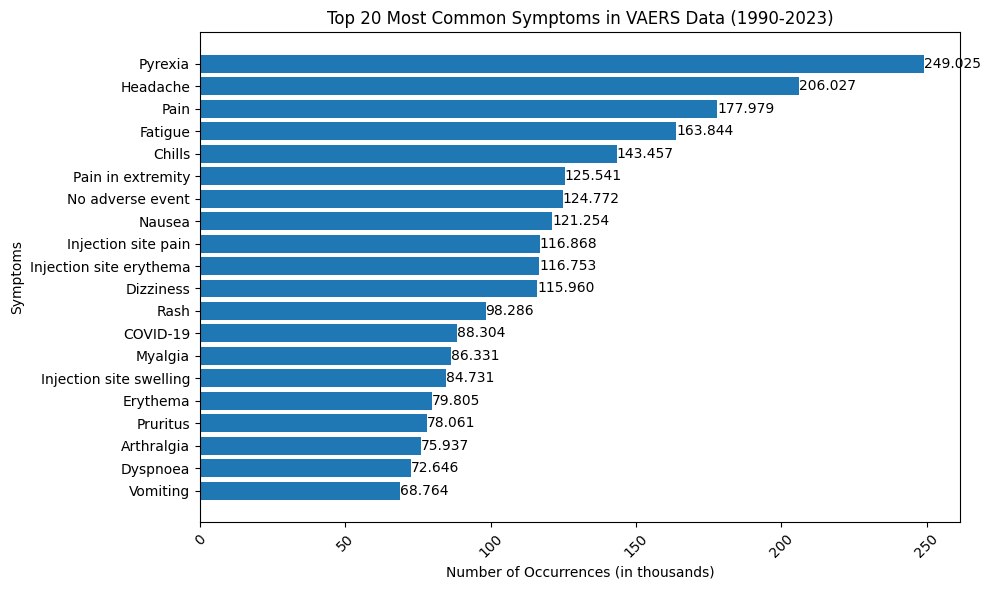

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

all_years_symptoms = pd.DataFrame()
for year in range(1990, 2024):
    file_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSSYMPTOMS.csv"
    yearly_symptoms_df = pd.read_csv(file_path, encoding='ISO-8859-1')
    all_years_symptoms = pd.concat([all_years_symptoms, yearly_symptoms_df])

all_symptoms = pd.concat([all_years_symptoms['SYMPTOM1'], all_years_symptoms['SYMPTOM2'], 
                          all_years_symptoms['SYMPTOM3'], all_years_symptoms['SYMPTOM4'], 
                          all_years_symptoms['SYMPTOM5']])

most_common_symptoms = all_symptoms.value_counts().head(20)

plt.figure(figsize=(10, 6))
bars = plt.barh(most_common_symptoms.index, most_common_symptoms.values)

plt.title('Top 20 Most Common Symptoms in VAERS Data (1990-2023)')
plt.xlabel('Number of Occurrences (in thousands)')
plt.ylabel('Symptoms')

# Adding the text inside the bars
for bar in bars:
    label = f'{bar.get_width():,.0f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             label, 
             va='center', ha='left', color='black')

plt.gca().invert_yaxis()  # Invert y-axis to have the most common symptom at the top

# Format x-axis labels in thousands
def format_thousands(x, pos):
    return f'{x/1000:.0f}'

formatter = FuncFormatter(format_thousands)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Now for people that got vaccinated with the COVID-19 vaccine

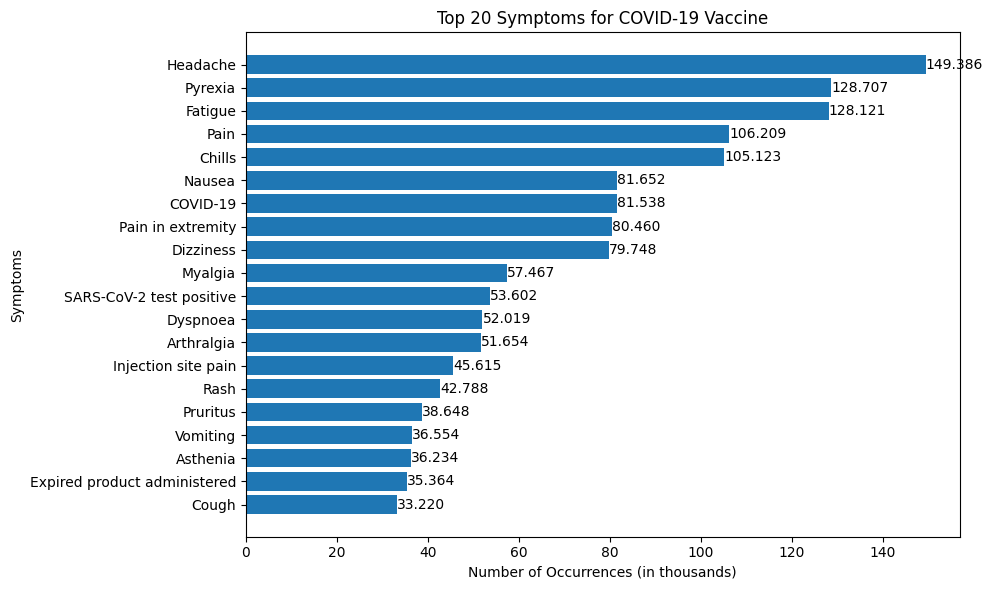

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your datasets in a specified directory
base_path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"

all_covid_symptoms = pd.DataFrame()

for year in range(2020, 2024):
    vax_file_path = f"{base_path}{year}VAERSVAX.csv"
    symptoms_file_path = f"{base_path}{year}VAERSSYMPTOMS.csv"
    
    # Load vaccine data and filter for COVID-19 vaccines
    vax_df = pd.read_csv(vax_file_path, encoding='ISO-8859-1')
    covid_vax_ids = vax_df[vax_df['VAX_TYPE'] == "COVID19"]['VAERS_ID']

    # Load symptoms data and filter based on COVID-19 vaccine IDs
    symptoms_df = pd.read_csv(symptoms_file_path, encoding='ISO-8859-1')
    covid_symptoms_df = symptoms_df[symptoms_df['VAERS_ID'].isin(covid_vax_ids)]
    
    # Combine all symptom columns
    covid_all_symptoms = pd.concat([covid_symptoms_df['SYMPTOM1'], covid_symptoms_df['SYMPTOM2'], 
                                    covid_symptoms_df['SYMPTOM3'], covid_symptoms_df['SYMPTOM4'], 
                                    covid_symptoms_df['SYMPTOM5']])
    all_covid_symptoms = pd.concat([all_covid_symptoms, covid_all_symptoms])

# Counting the occurrences of each symptom
most_common_covid_symptoms = all_covid_symptoms.value_counts().head(20)

# Convert the Series to a DataFrame
df = most_common_covid_symptoms.reset_index()
df.columns = ['Symptom', 'Count']

# Sorting the DataFrame
df = df.sort_values(by='Count', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Symptom'], df['Count'] / 1000)  # Divide the count by 1000 to convert to thousands

# Adding labels and title
plt.xlabel('Number of Occurrences (in thousands)')
plt.ylabel('Symptoms')
plt.title('Top 20 Symptoms for COVID-19 Vaccine')

# Adding the text inside the bars with thousands separator
for bar in bars:
    label = f'{bar.get_width():,.3f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             label, 
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()